In [67]:
import pandas as pd
import missingno as msno
from random import uniform


In [68]:
column_names = [
    "Carbon concentration w%",
    "Silicon concentration w%",
    "Manganese concentration w%",
    "Sulphur concentration w%",
    "Phosphorus concentration w%",
    "Nickel concentration w%",
    "Chromium concentration w%",
    "Molybdenum concentration w%",
    "Vanadium concentration w%",
    "Copper concentration w%",
    "Cobalt concentration w%",
    "Tungsten concentration w%",
    "Oxygen concentration / ppm",
    "Titanium concentration / ppm",
    "Nitrogen concentration / ppm",
    "Aluminium concentration / ppm",
    "Boron concentration / ppm",
    "Niobium concentration / ppm",
    "Tin concentration / ppm",
    "Arsenic concentration / ppm",
    "Antimony concentration / ppm",
    "Current / A",
    "Voltage / V",
    "AC or DC",
    "Electrode positive or negative",
    "Heat input / kJmm-1",
    "Interpass temperature / °C",
    "Type of weld",
    "Post weld heat treatment temperature / °C",
    "Post weld heat treatment time / hours",
    "Yield strength / MPa",
    "Ultimate tensile strength / MPa",
    "Elongation / %",
    "Reduction of Area / %",
    "Charpy temperature / °C",
    "Charpy impact toughness / J",
    "Hardness / kgmm-2",
    "50 % FATT",
    "Primary ferrite in microstructure / %",
    "Ferrite with second phase / %",
    "Acicular ferrite / %",
    "Martensite / %",
    "Ferrite with carbide aggregate / %",
    "Weld ID"
]

In [69]:
len(column_names)

44

In [70]:
df = pd.read_csv("./welddb/welddb.data", delim_whitespace=True, na_values='N', names= column_names, index_col=False)

/tmp/ipykernel_938053/3604970744.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("./welddb/welddb.data", delim_whitespace=True, na_values='N', names= column_names, index_col=False)


In [71]:
df.columns

Index(['Carbon concentration w%', 'Silicon concentration w%',
       'Manganese concentration w%', 'Sulphur concentration w%',
       'Phosphorus concentration w%', 'Nickel concentration w%',
       'Chromium concentration w%', 'Molybdenum concentration w%',
       'Vanadium concentration w%', 'Copper concentration w%',
       'Cobalt concentration w%', 'Tungsten concentration w%',
       'Oxygen concentration / ppm', 'Titanium concentration / ppm',
       'Nitrogen concentration / ppm', 'Aluminium concentration / ppm',
       'Boron concentration / ppm', 'Niobium concentration / ppm',
       'Tin concentration / ppm', 'Arsenic concentration / ppm',
       'Antimony concentration / ppm', 'Current / A', 'Voltage / V',
       'AC or DC', 'Electrode positive or negative', 'Heat input / kJmm-1',
       'Interpass temperature / °C', 'Type of weld',
       'Post weld heat treatment temperature / °C',
       'Post weld heat treatment time / hours', 'Yield strength / MPa',
       'Ultimate ten

In [72]:
df

,Carbon concentration w%,Silicon concentration w%,Manganese concentration w%,Sulphur concentration w%,Phosphorus concentration w%,Nickel concentration w%,Chromium concentration w%,Molybdenum concentration w%,Vanadium concentration w%,Copper concentration w%,...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Birmingham-MAX38


In [73]:
categorical_cols = ["AC or DC", "Electrode positive or negative", "Type of weld", "50 % FATT", "Weld ID"] 
numeric_cols = [col for col in column_names if col not in categorical_cols]

Some of the data has "< x", To deal with this, I just choose a random value between 0 and x 

In [74]:
def less_than_to_num(val):
    if isinstance(val, str) and val.startswith('<'):
            number = float(val[1:])
            return uniform(0, number)
    return val

df[numeric_cols] = df[numeric_cols].applymap(less_than_to_num)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_938053/823778001.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols] = df[numeric_cols].applymap(less_than_to_num)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Carbon concentration w%                    1652 non-null   float64
 1   Silicon concentration w%                   1652 non-null   float64
 2   Manganese concentration w%                 1652 non-null   float64
 3   Sulphur concentration w%                   1648 non-null   float64
 4   Phosphorus concentration w%                1642 non-null   float64
 5   Nickel concentration w%                    697 non-null    float64
 6   Chromium concentration w%                  784 non-null    float64
 7   Molybdenum concentration w%                793 non-null    float64
 8   Vanadium concentration w%                  928 non-null    float64
 9   Copper concentration w%                    578 non-null    float64
 10  Cobalt concentration w% 

<Axes: >

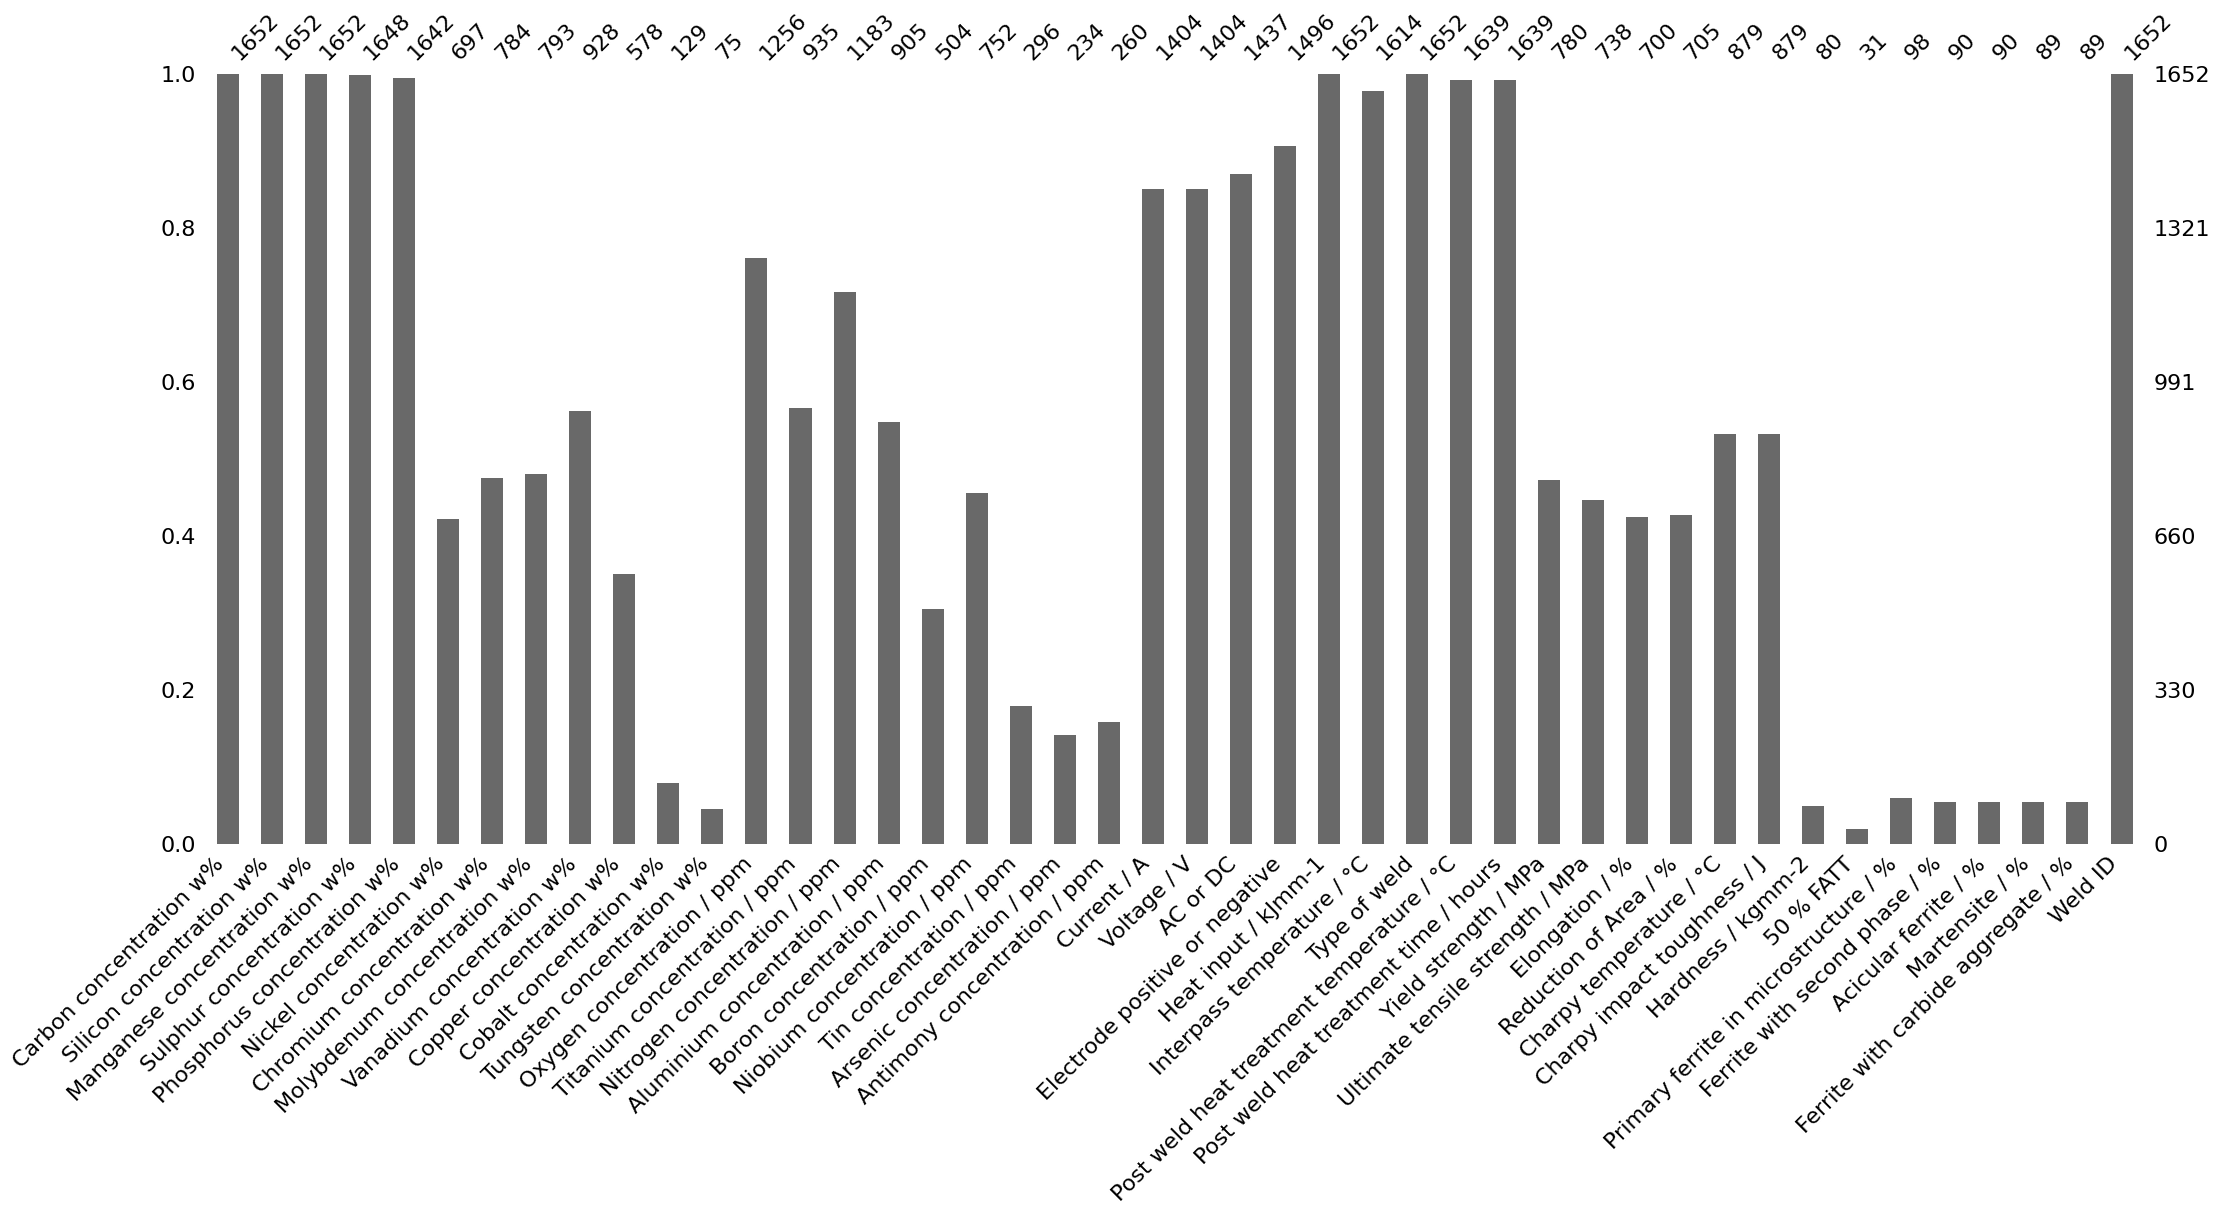

In [76]:
msno.bar(df)

Tungsten, Cobalt should probably be ignored ? 
Tin, Arsenic and Antimony might need to be analyzed in a different way

<Axes: >

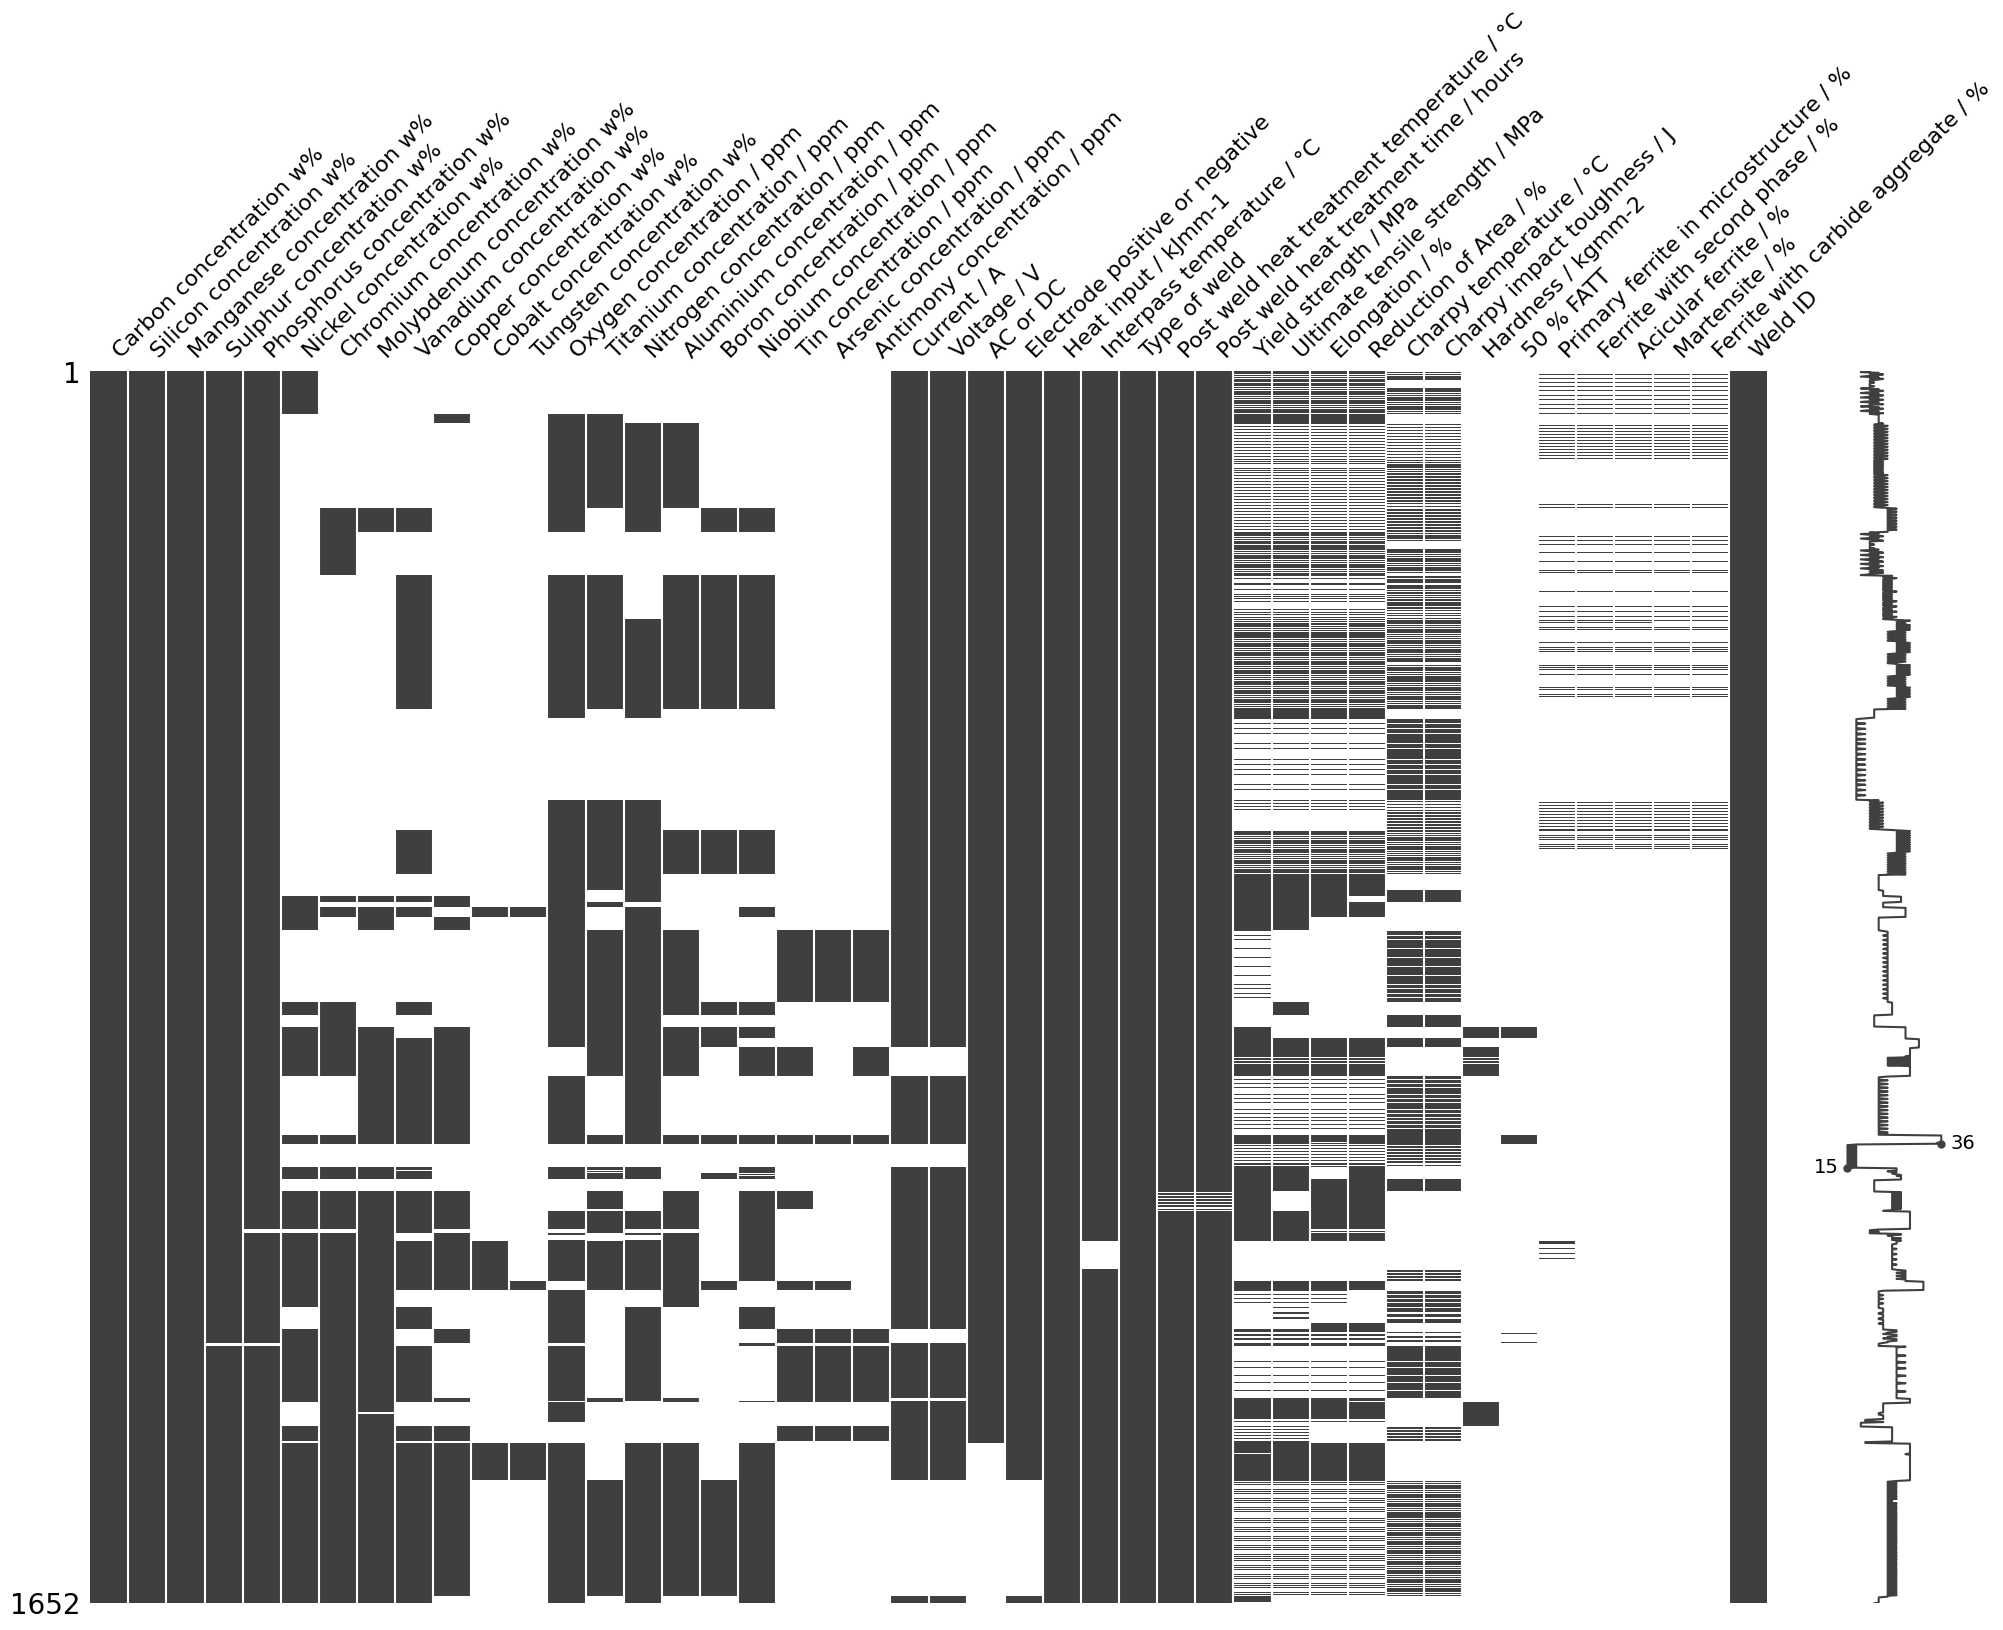

In [77]:
msno.matrix(df, figsize=(24,16))

<Axes: >

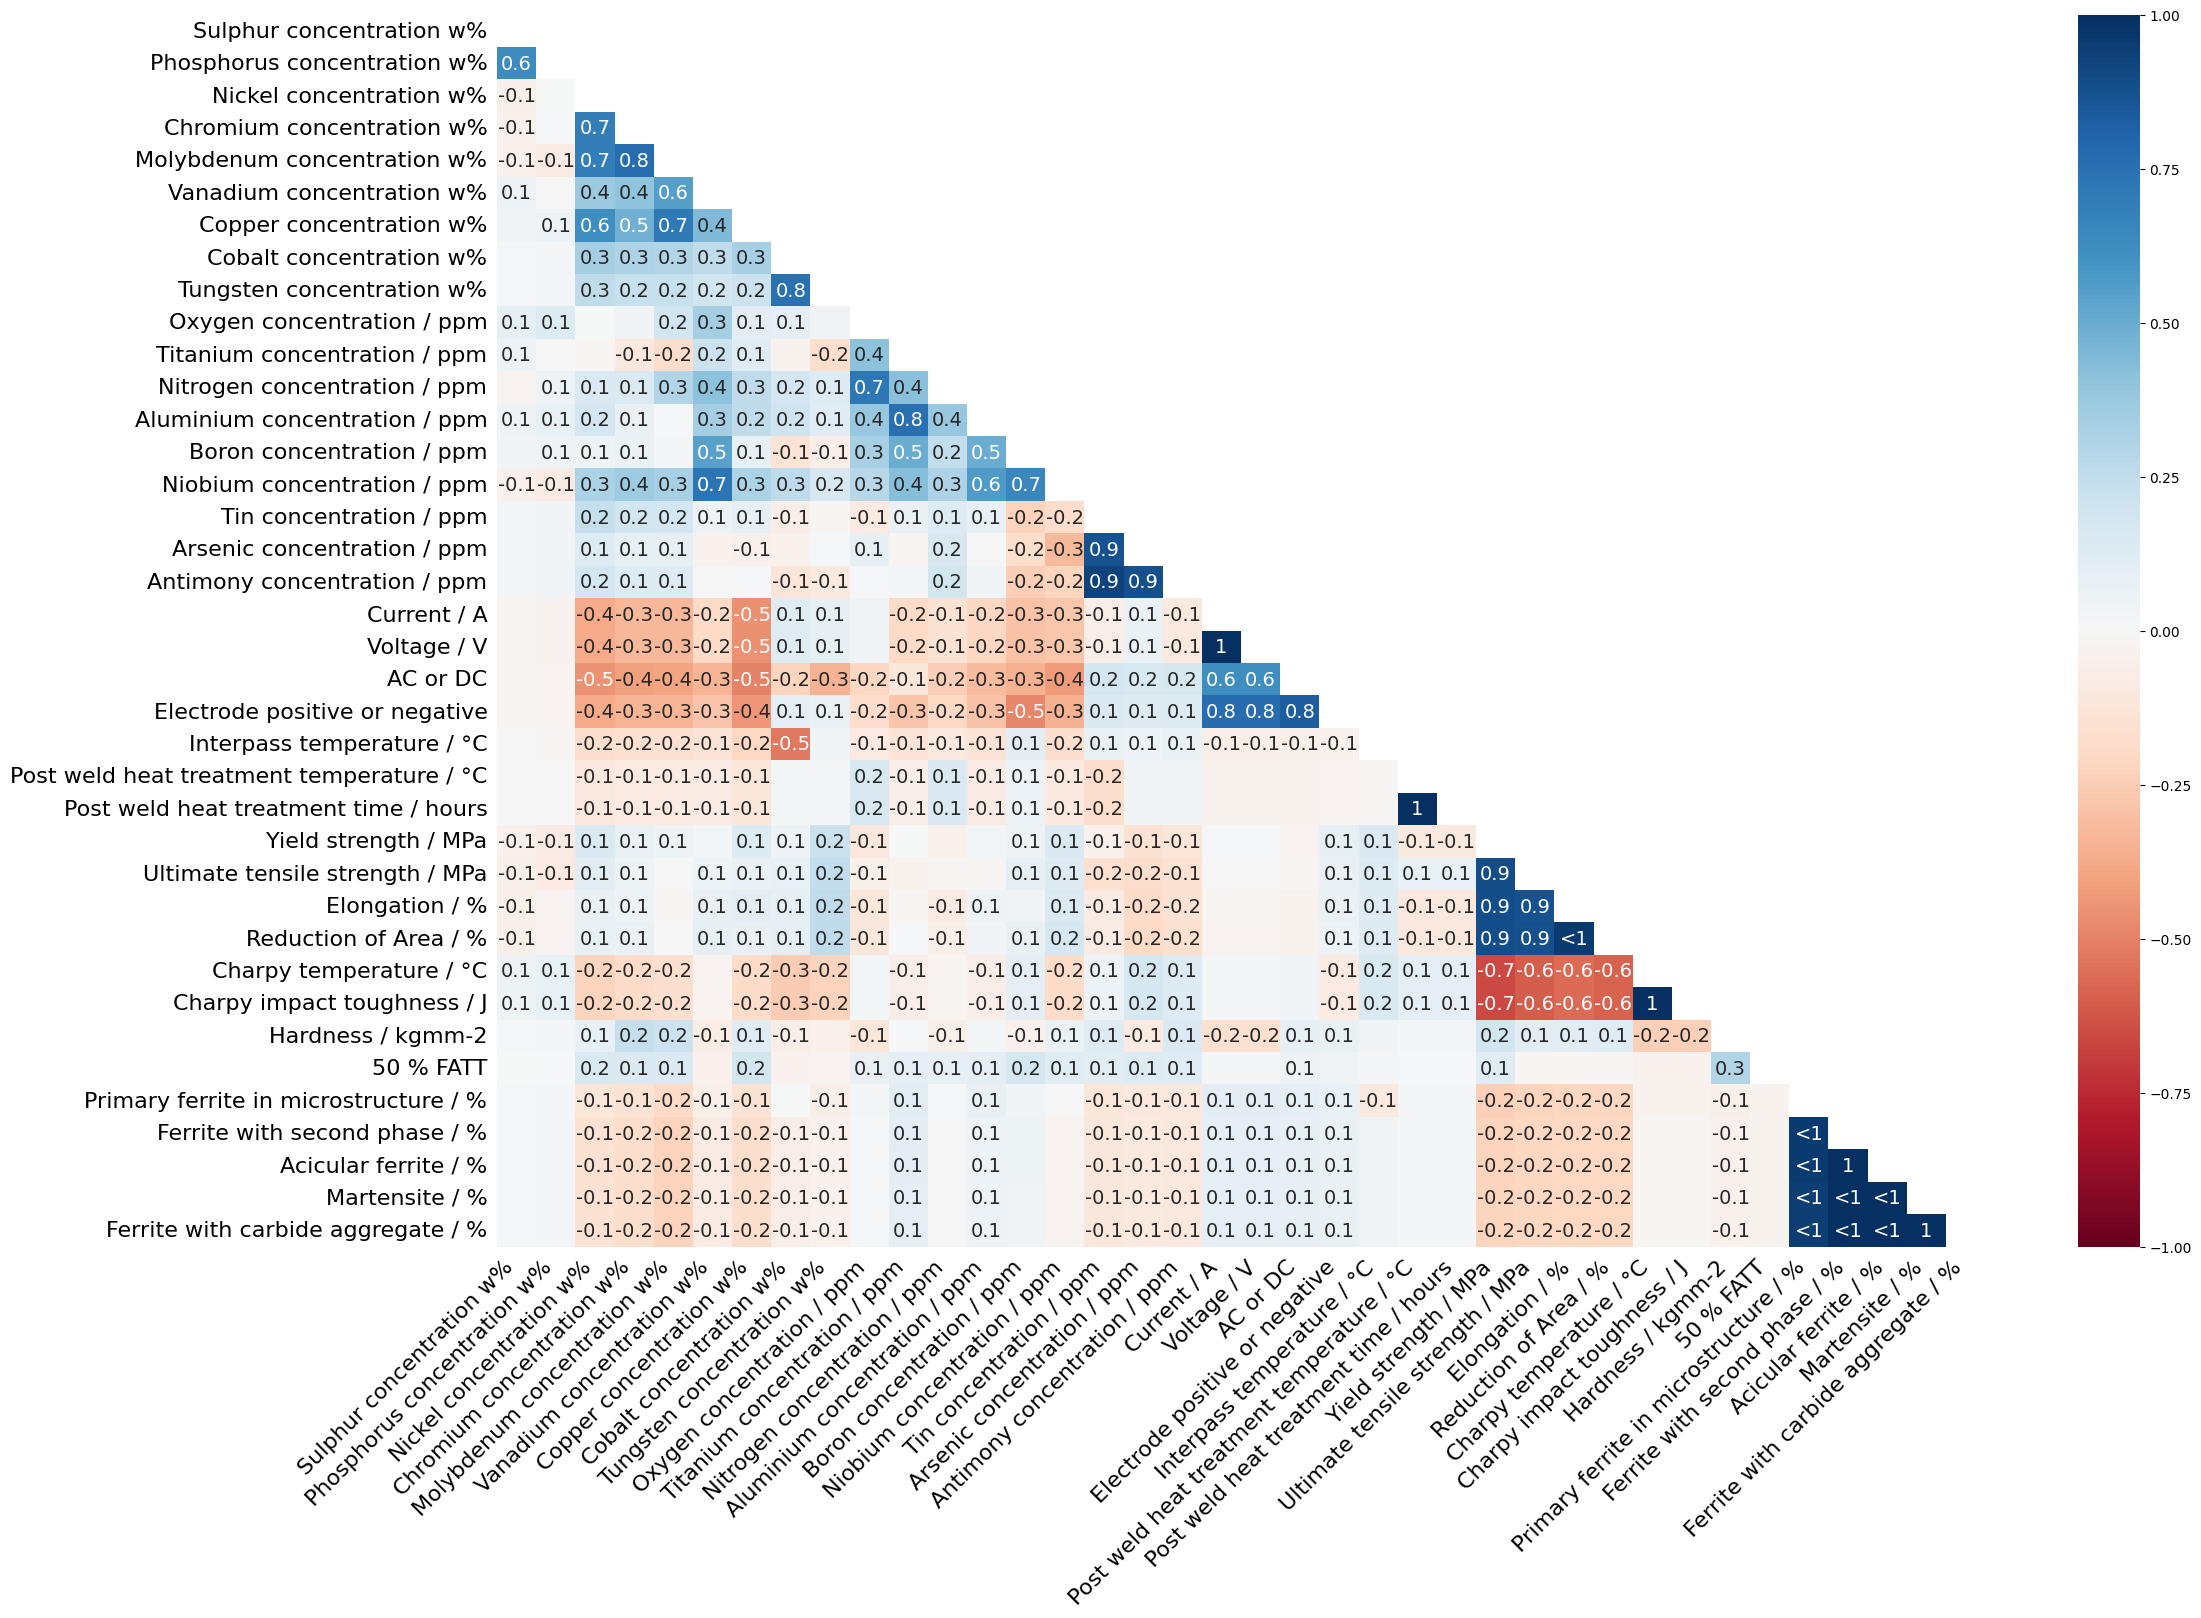

In [78]:
msno.heatmap(df, figsize=(24,16))

In [79]:
(df[categorical_cols].isna().sum() / len(df)) * 100

AC or DC                          13.014528
Electrode positive or negative     9.443099
Type of weld                       0.000000
50 % FATT                         98.123487
Weld ID                            0.000000
dtype: float64

50% FATT not always present 

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

def value_distribution(col_title, col):
    missing_pct = col.isnull().mean() * 100
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    if pd.api.types.is_numeric_dtype(col):
        sns.histplot(col.dropna(), kde=True)
    else: # the variable is categorical
        sns.countplot(y=col, order=col.value_counts().index)
    
    plt.title(f"{col_title}: {missing_pct:.2f}% missing")
    plt.xlabel(col_title)
    
    plt.show()

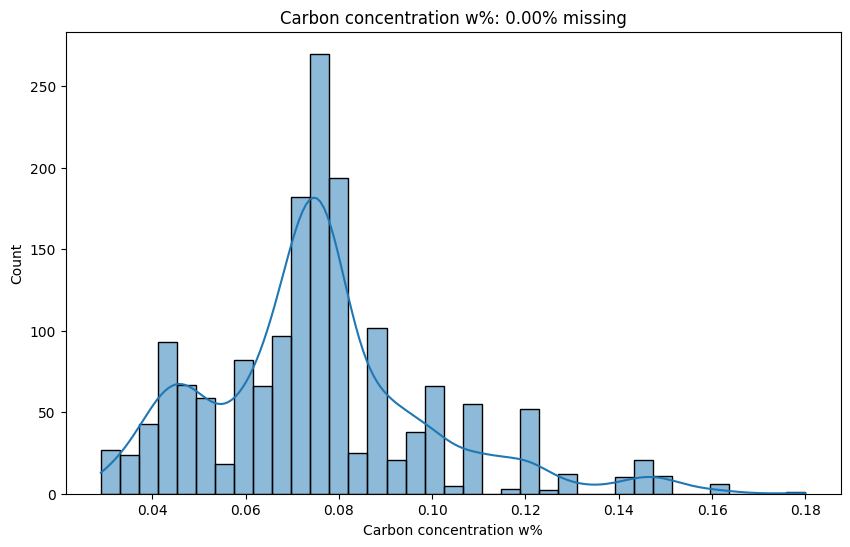

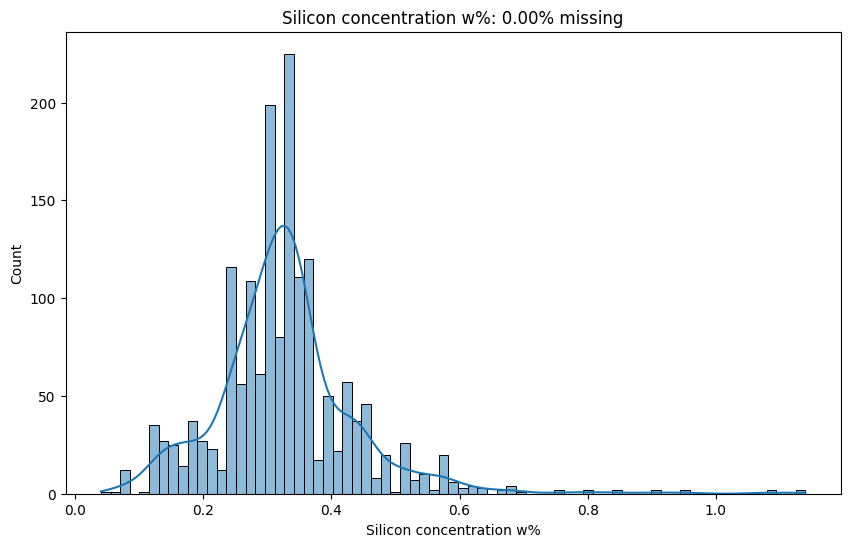

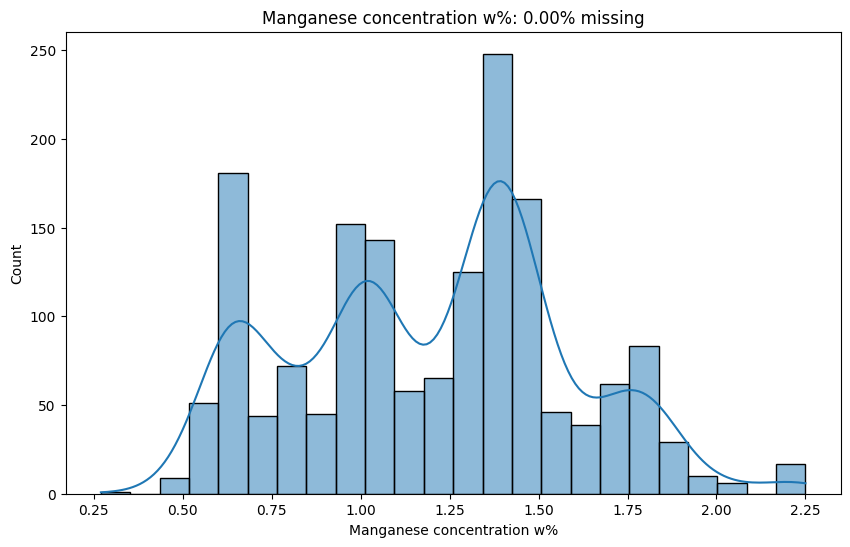

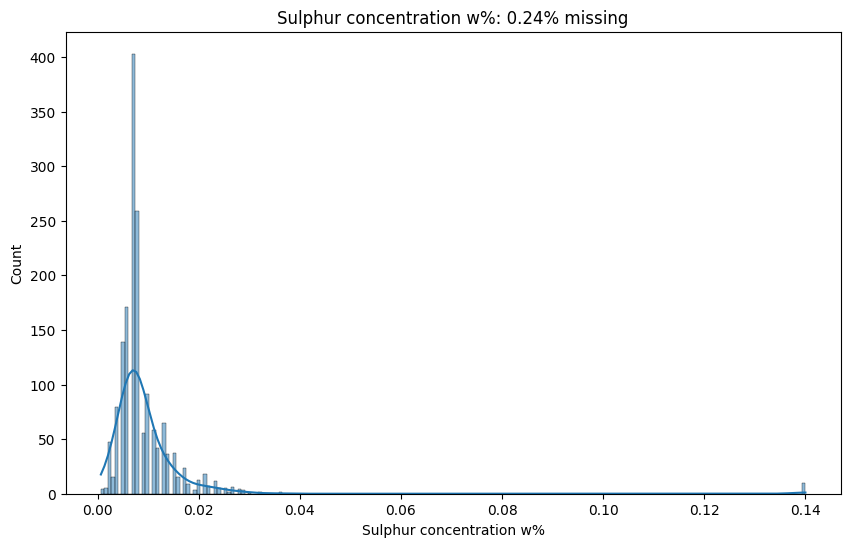

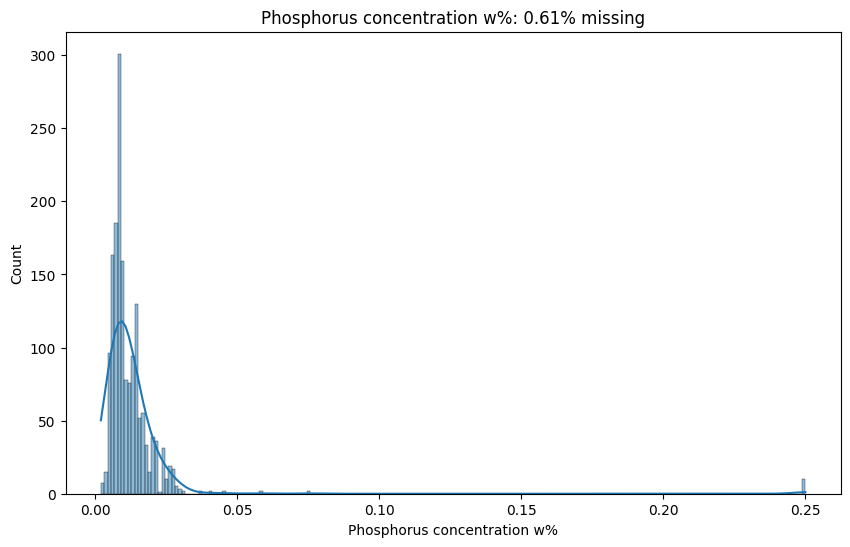

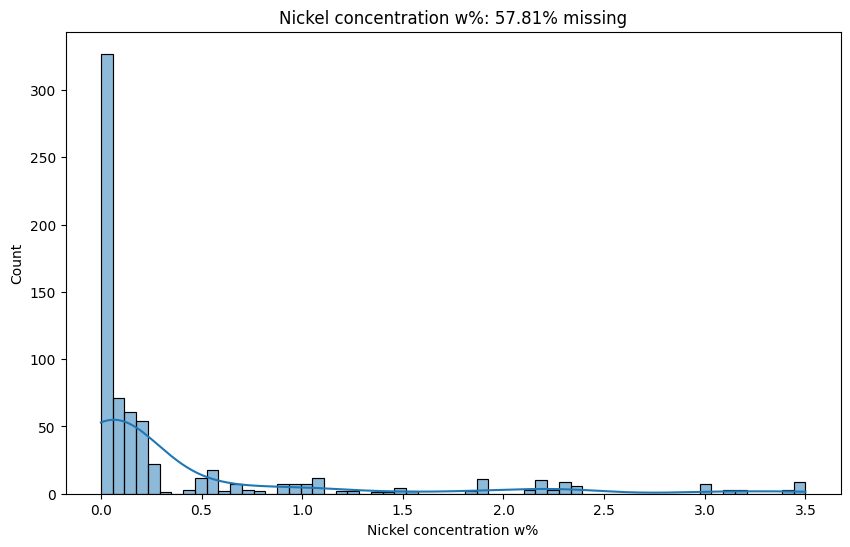

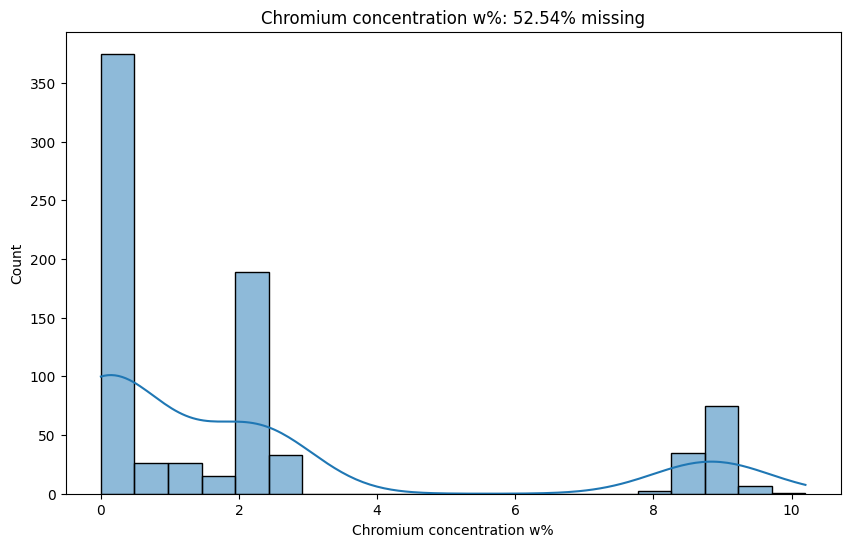

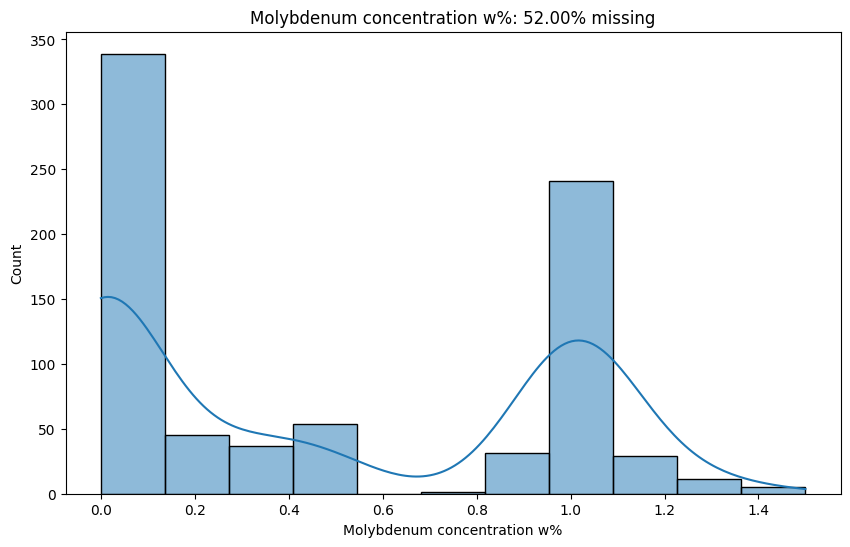

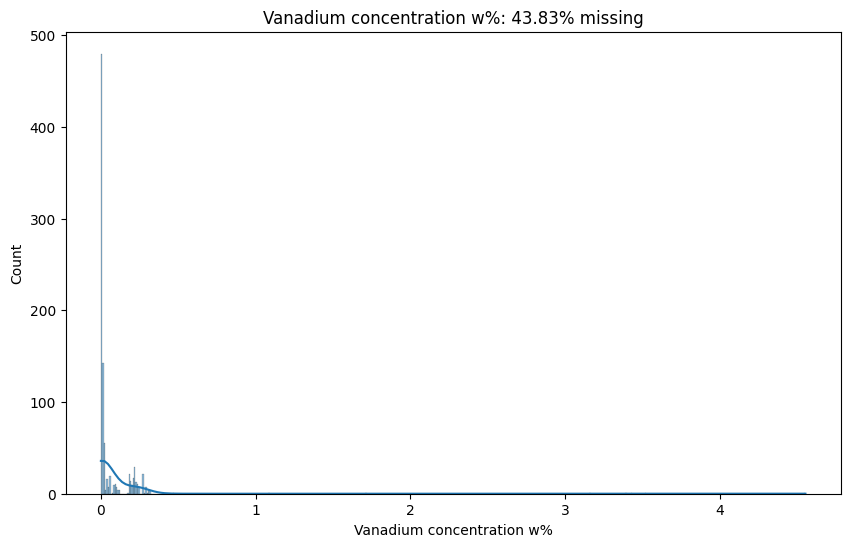

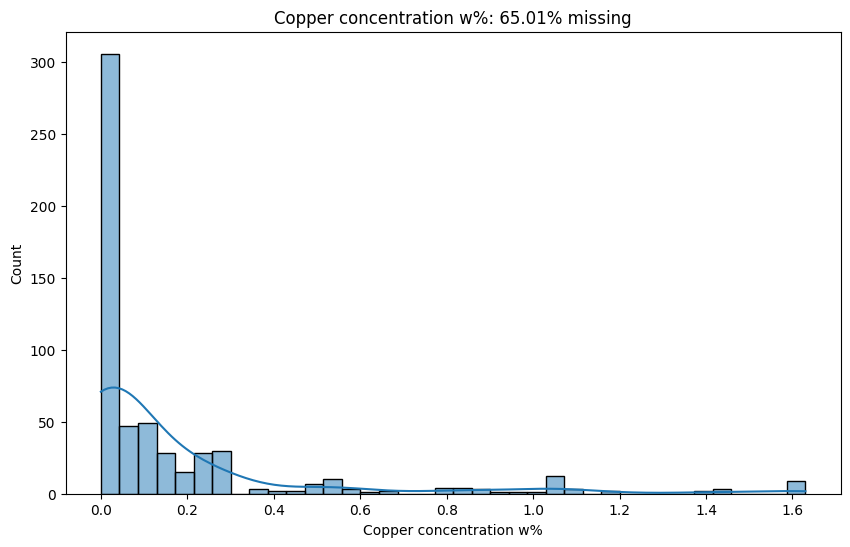

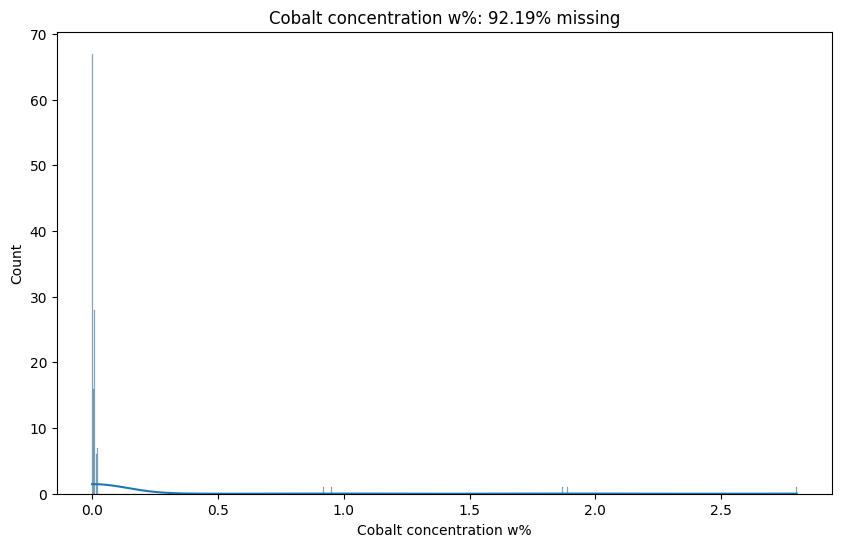

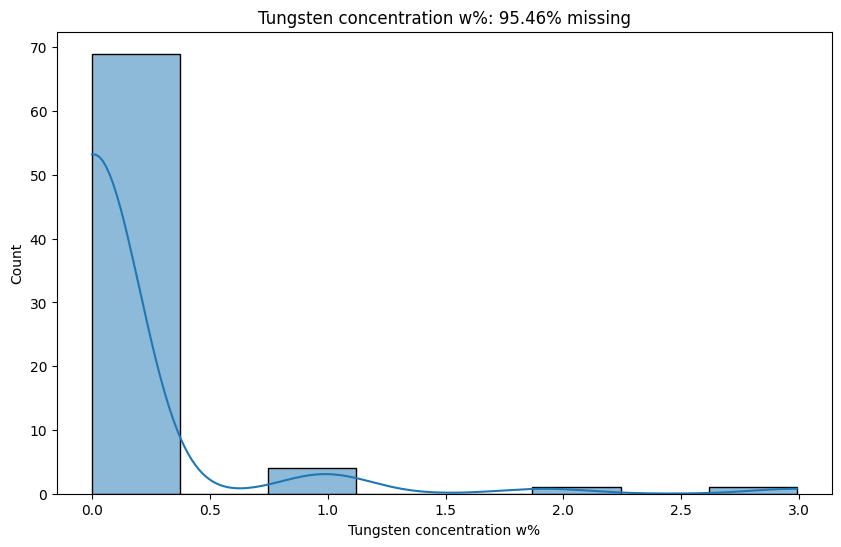

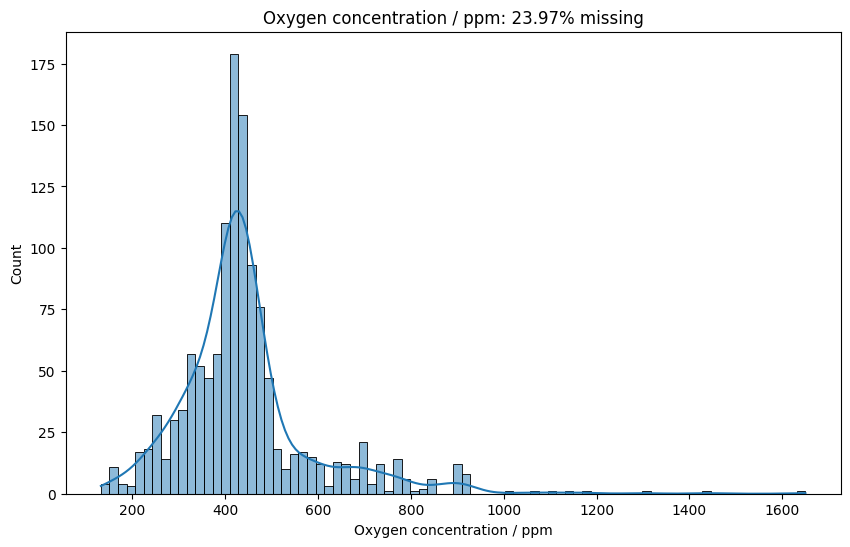

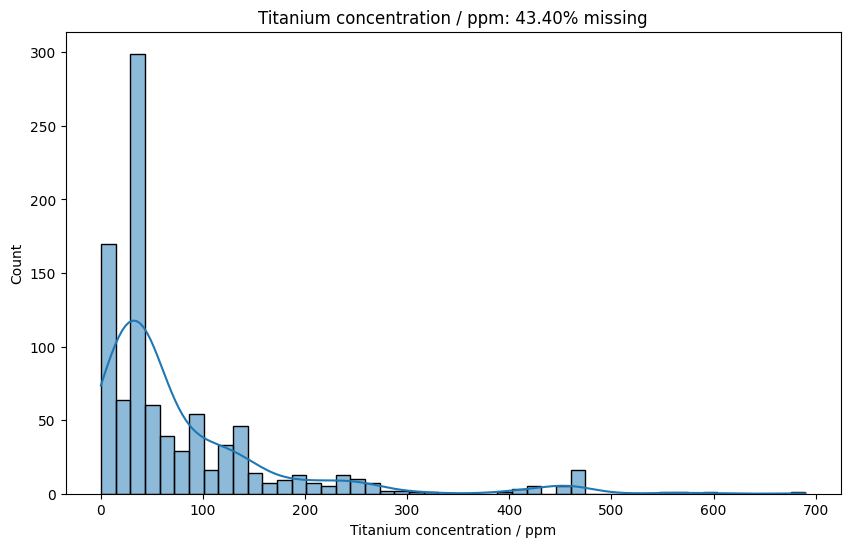

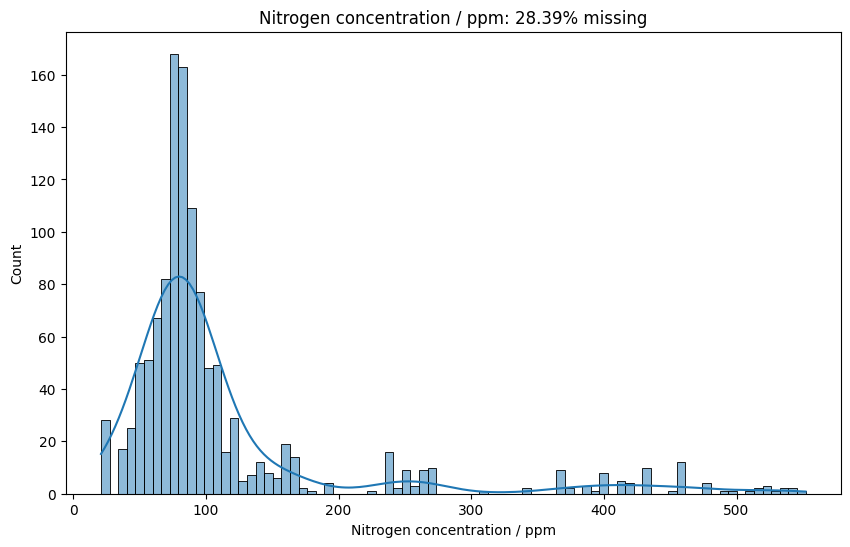

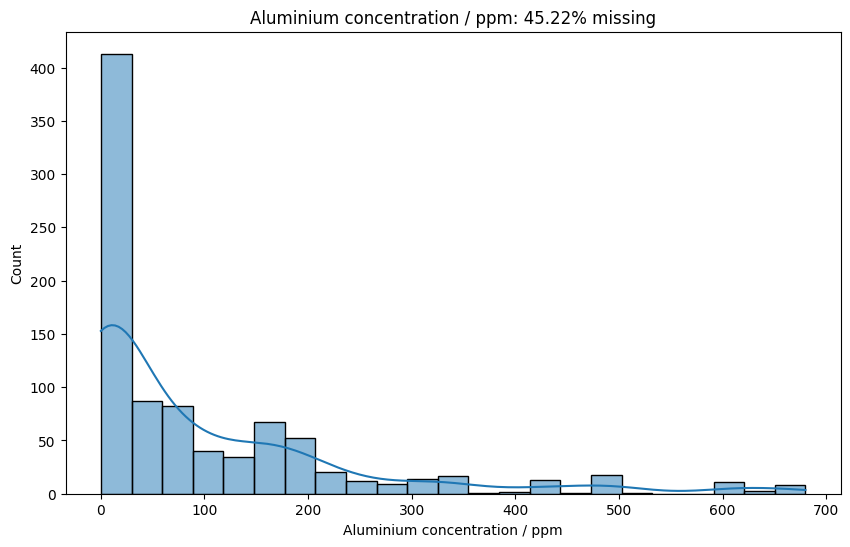

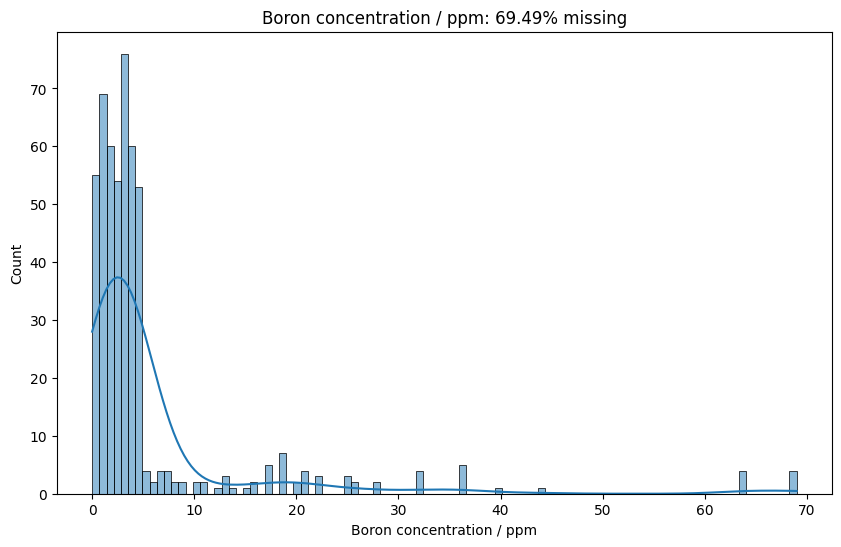

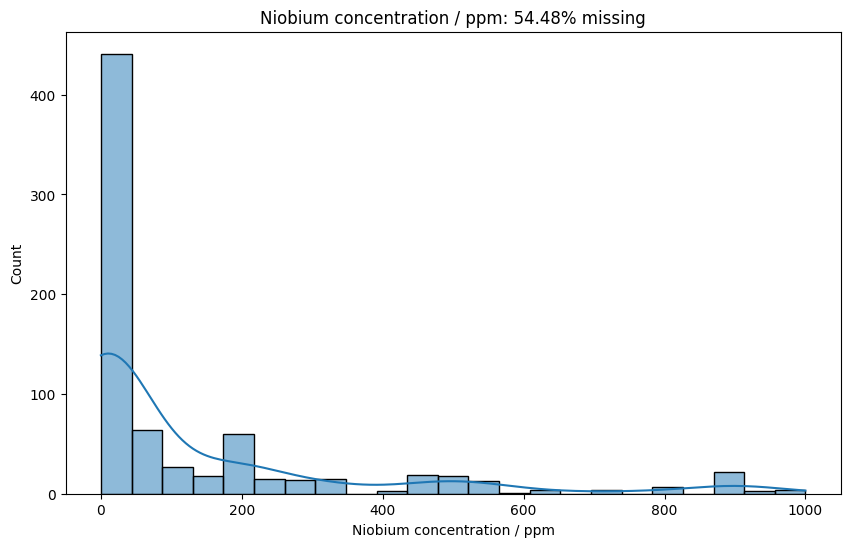

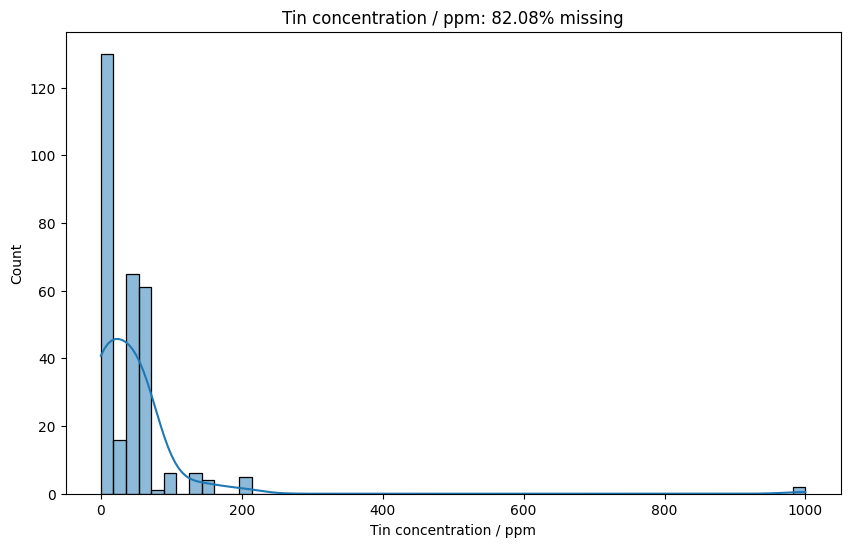

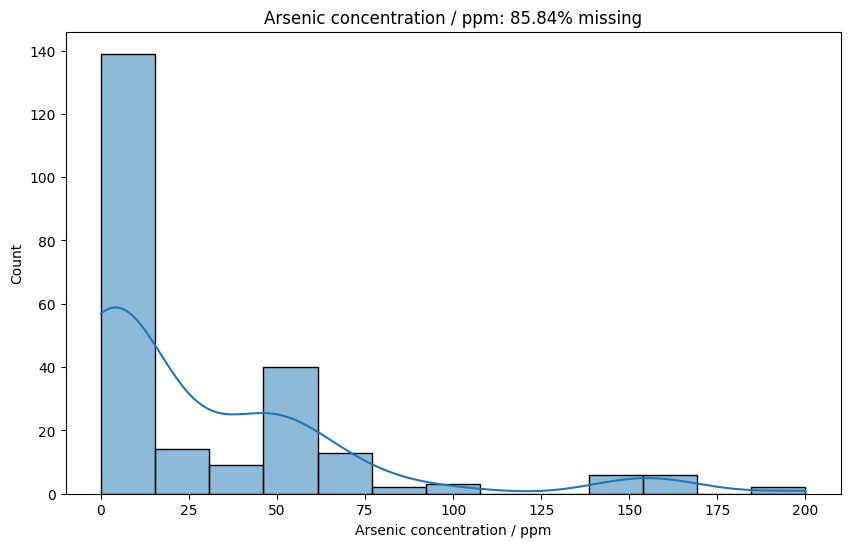

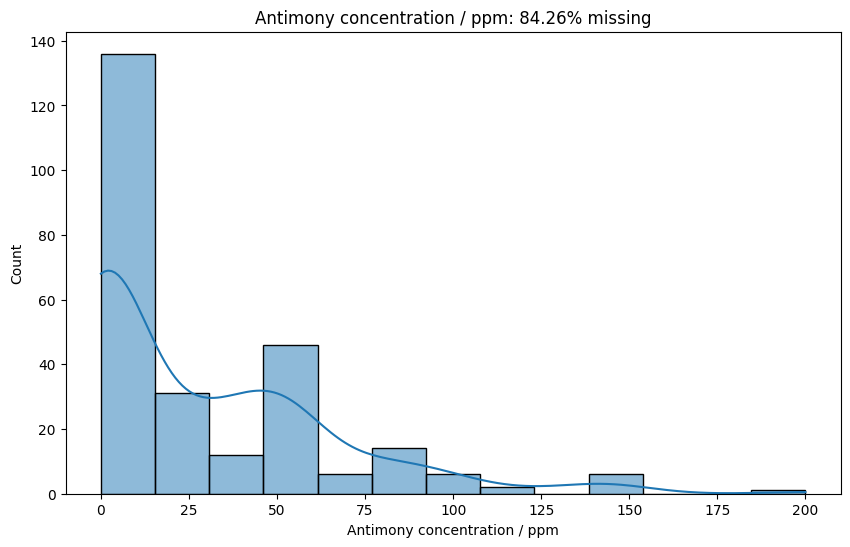

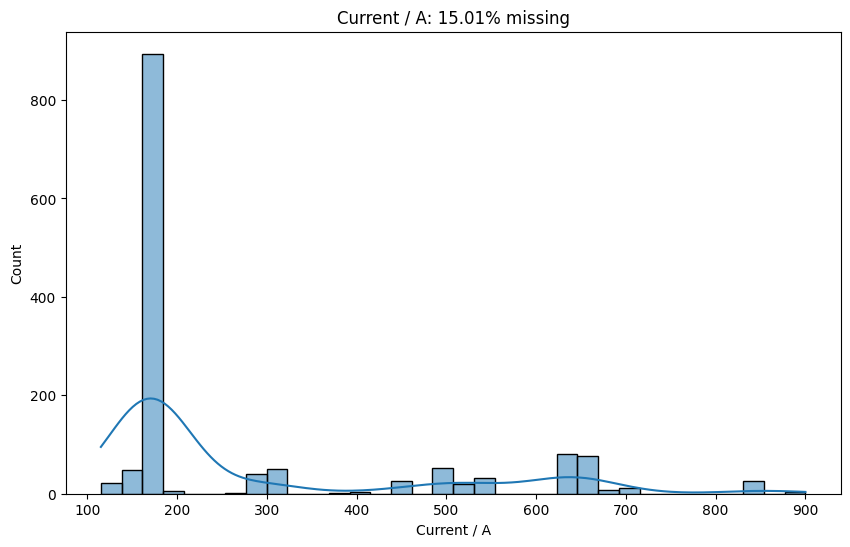

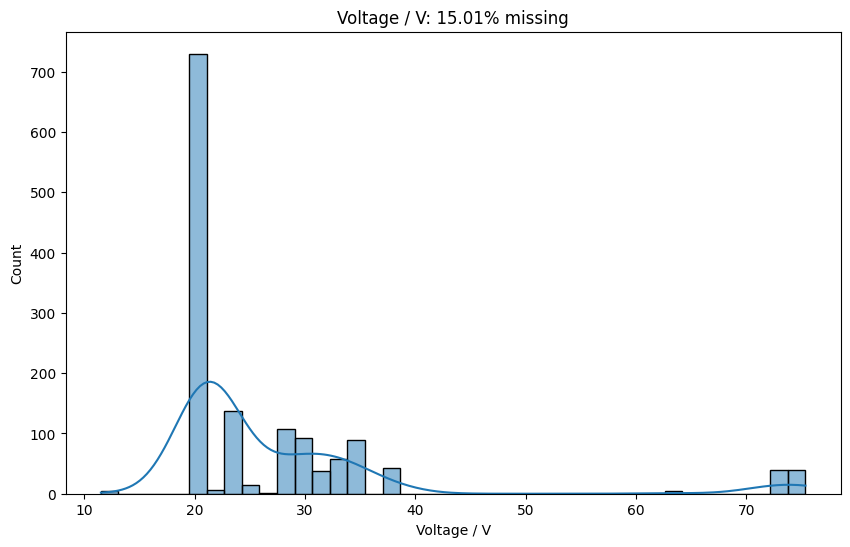

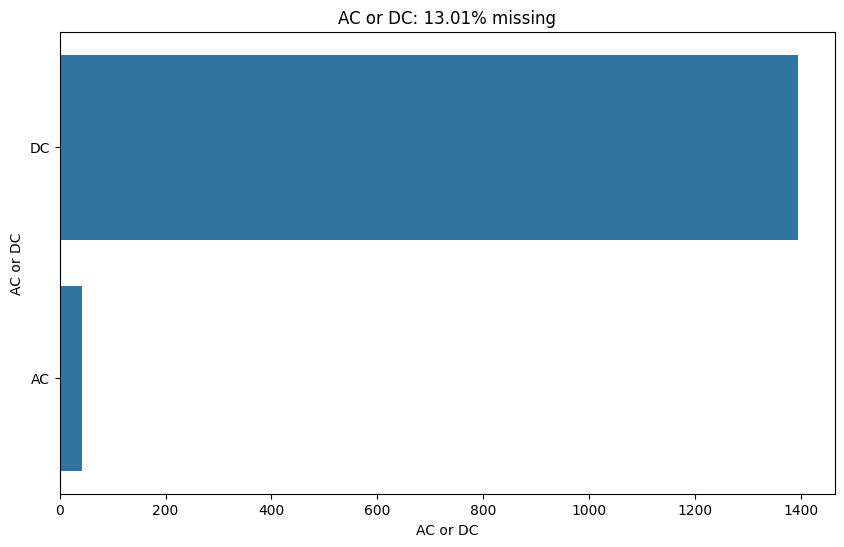

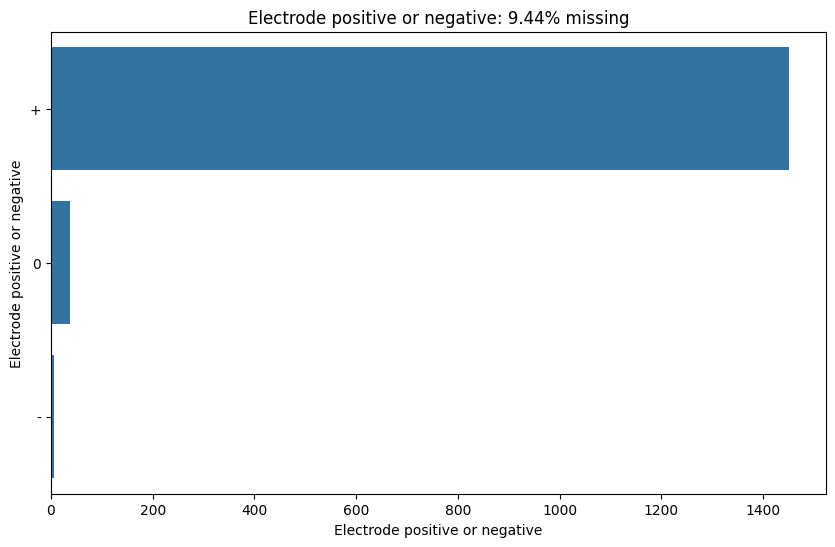

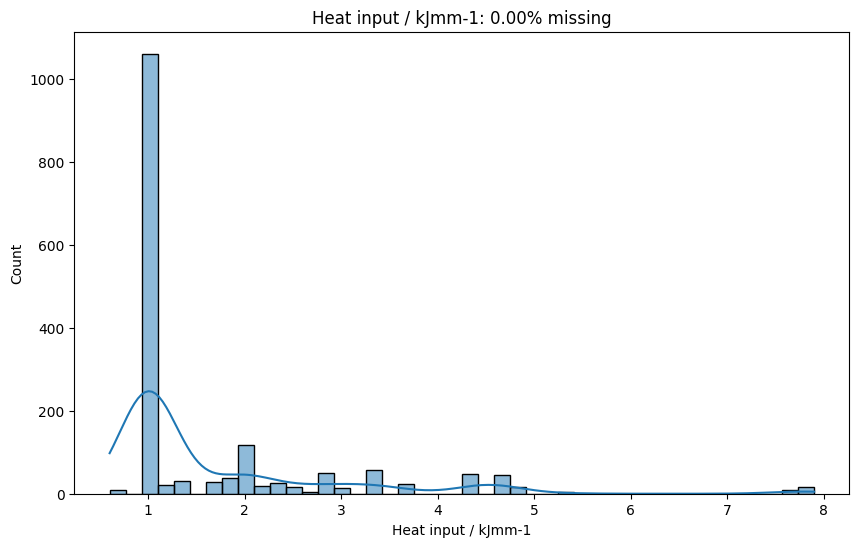

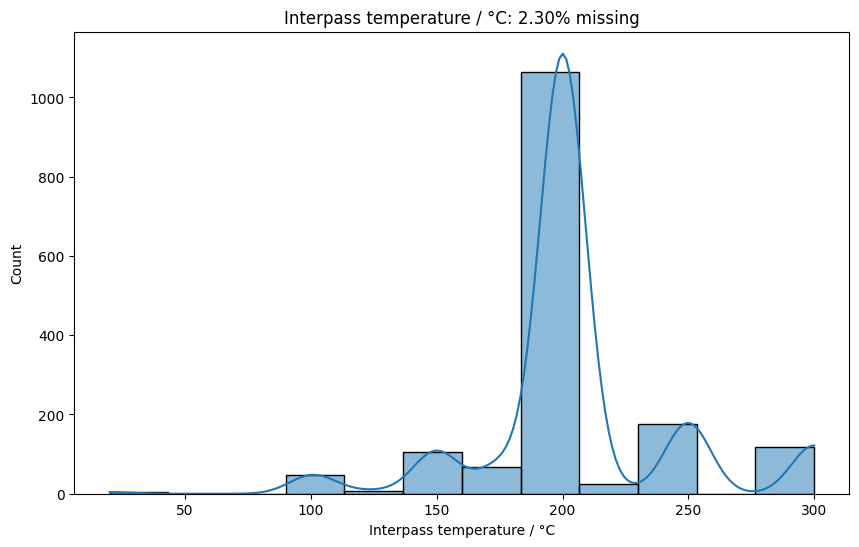

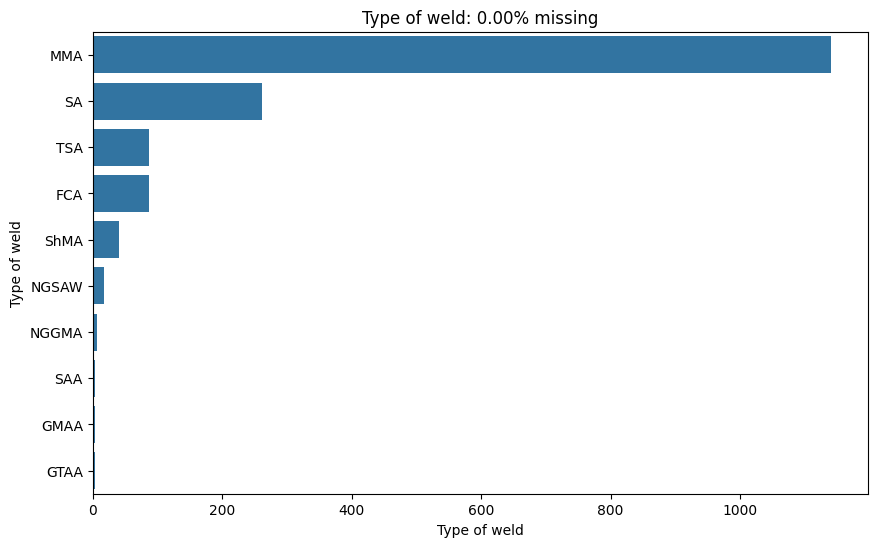

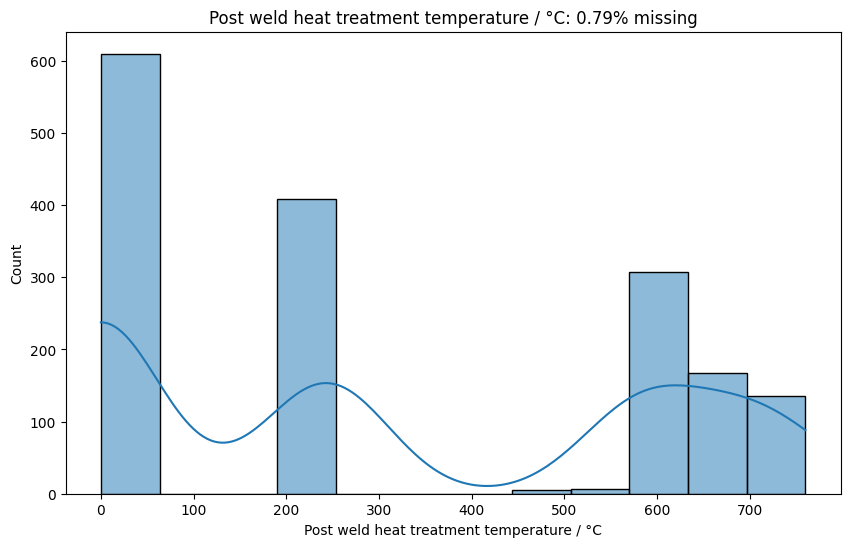

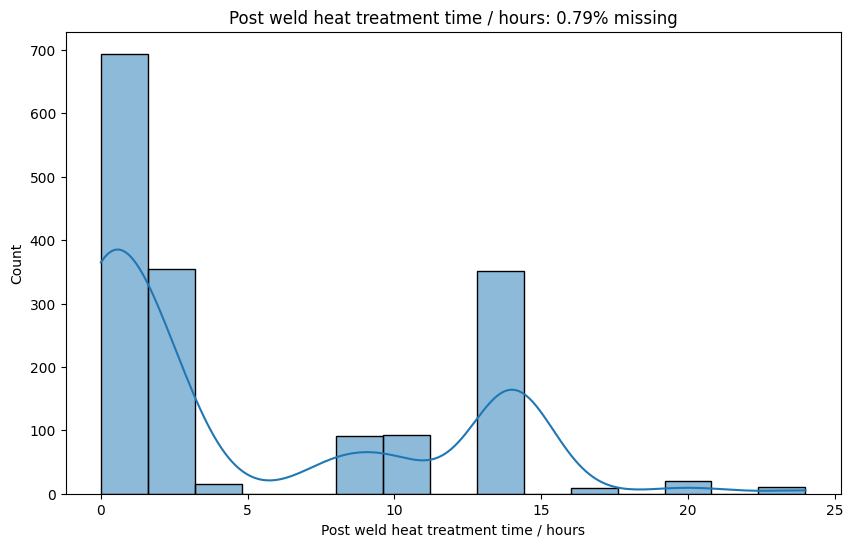

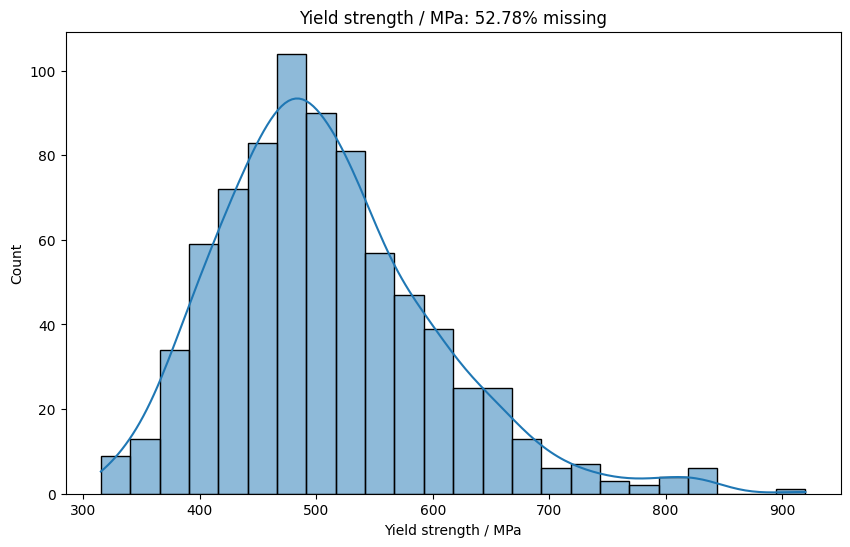

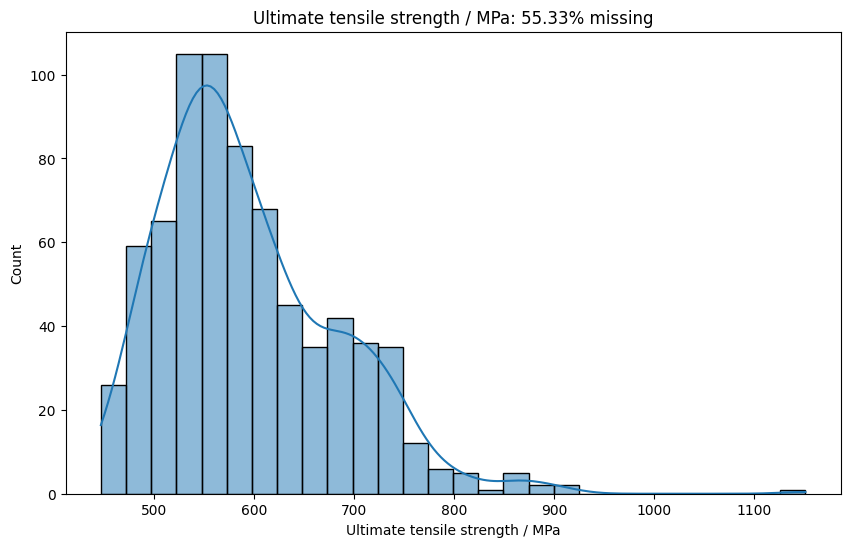

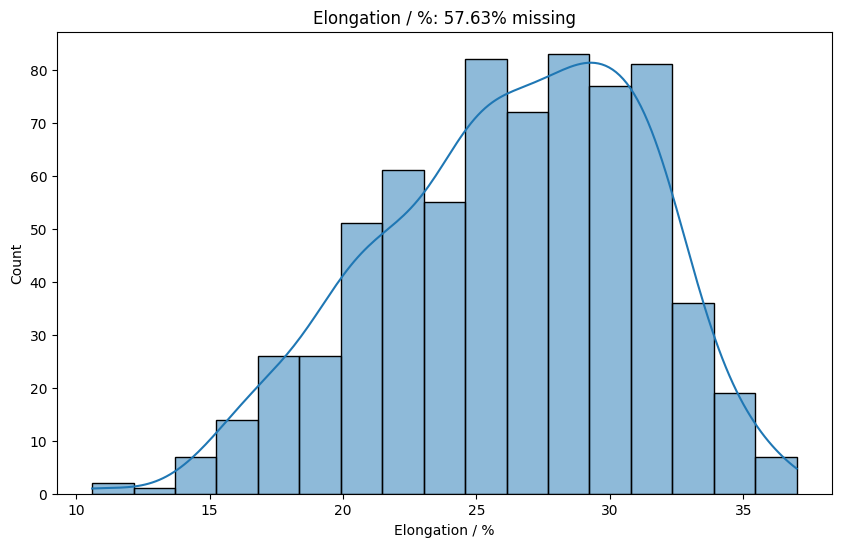

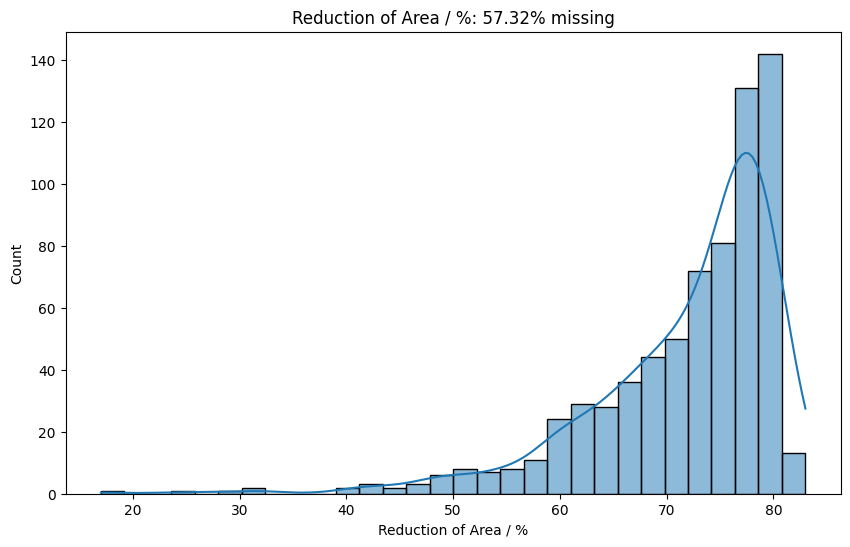

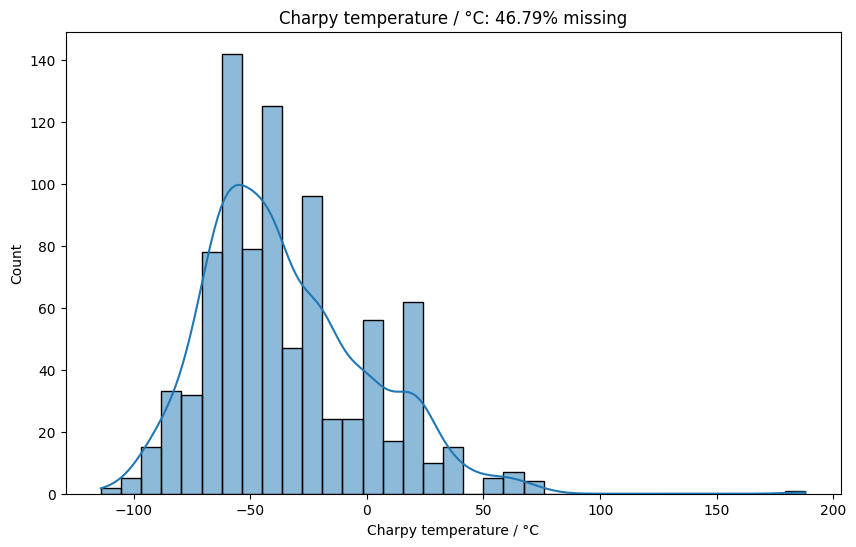

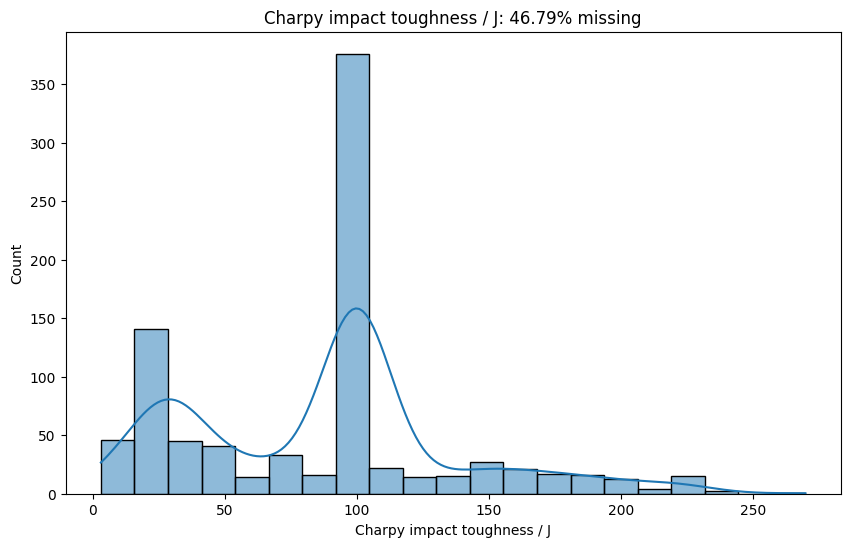

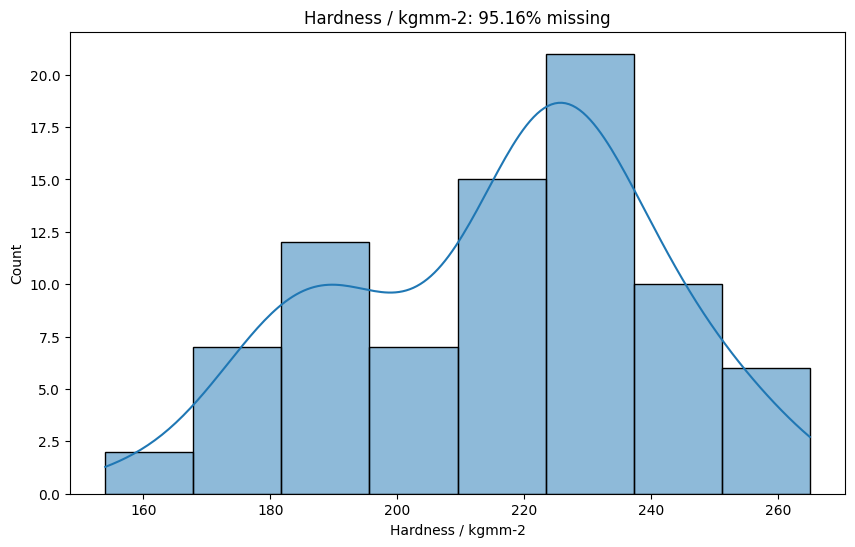

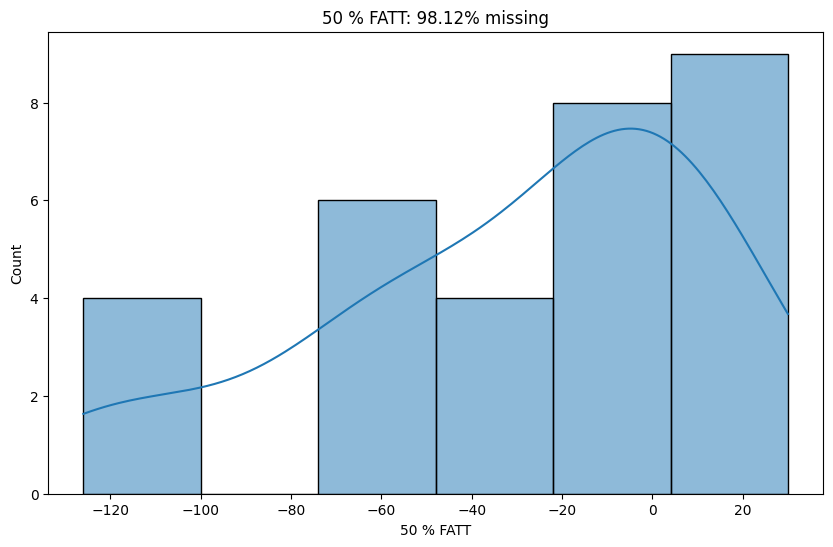

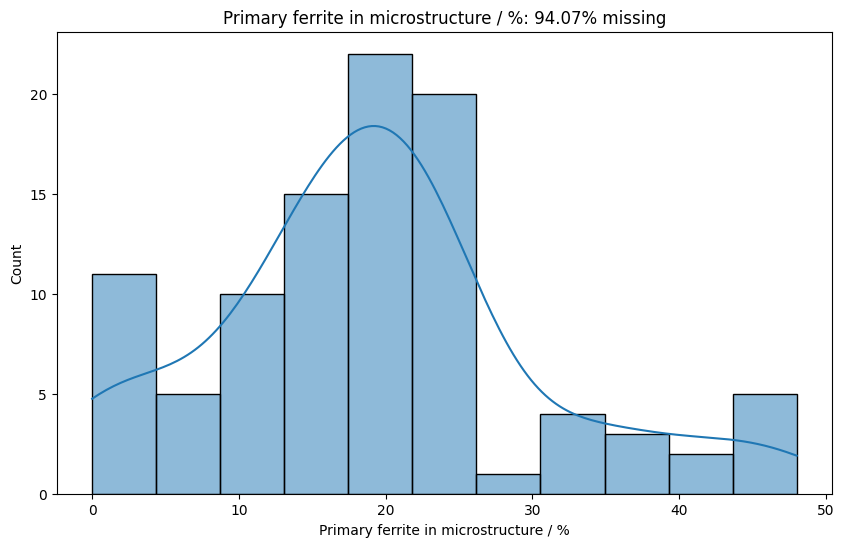

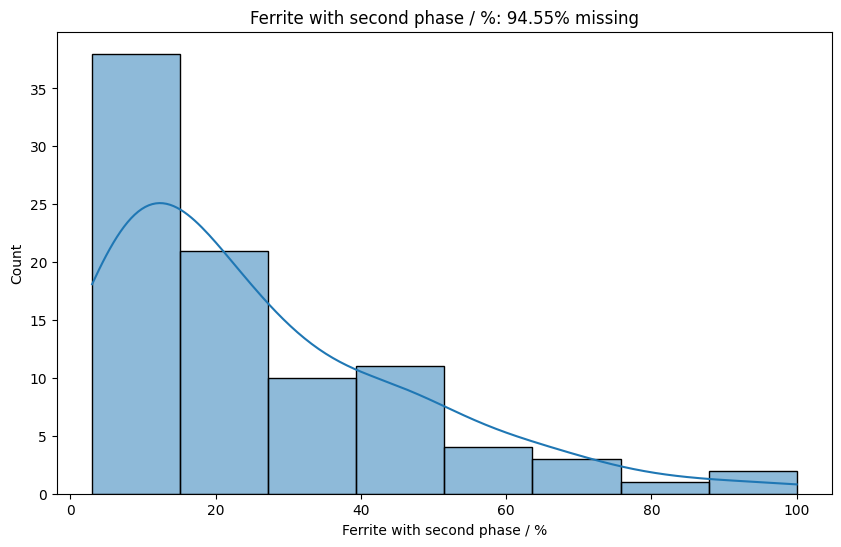

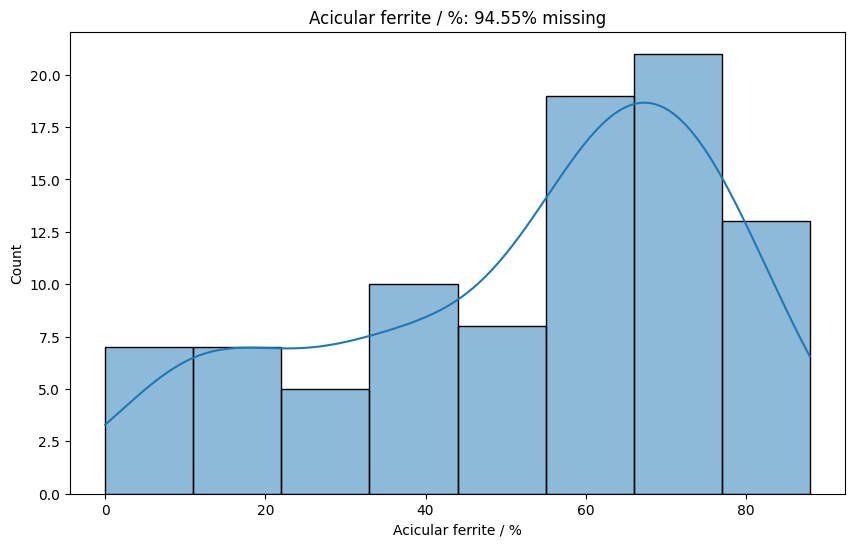

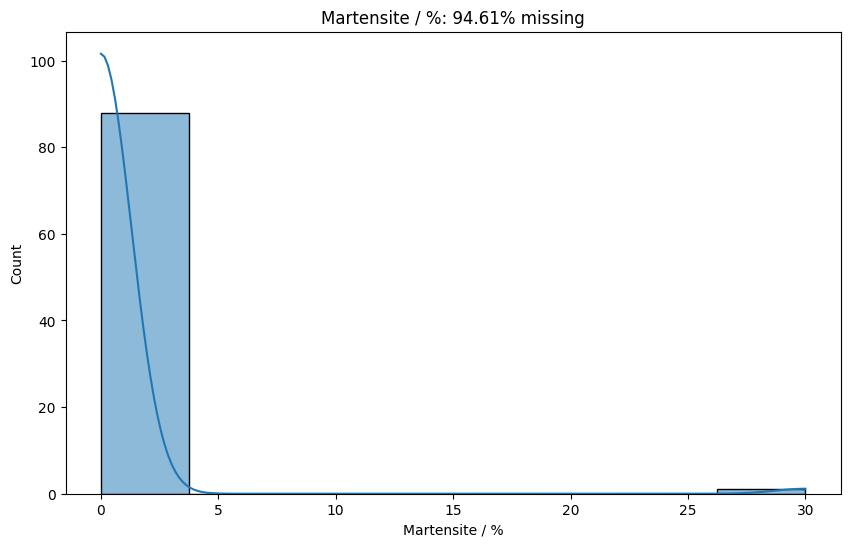

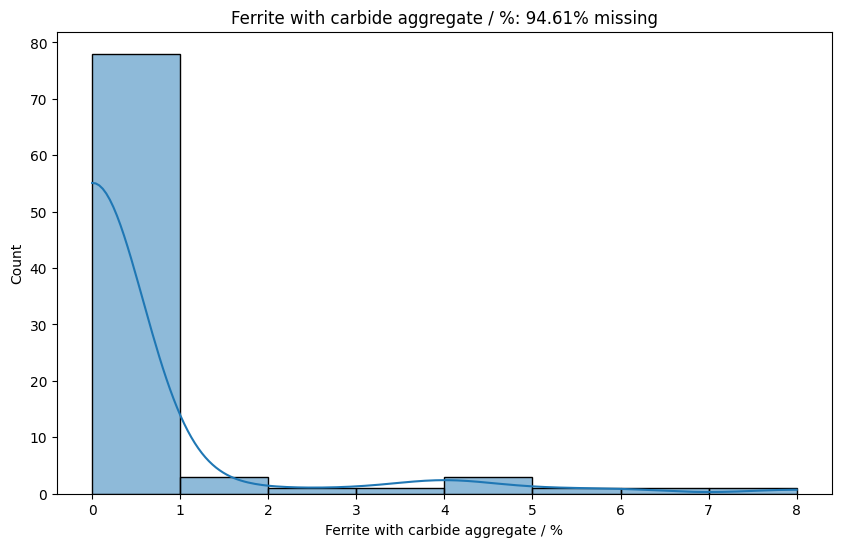

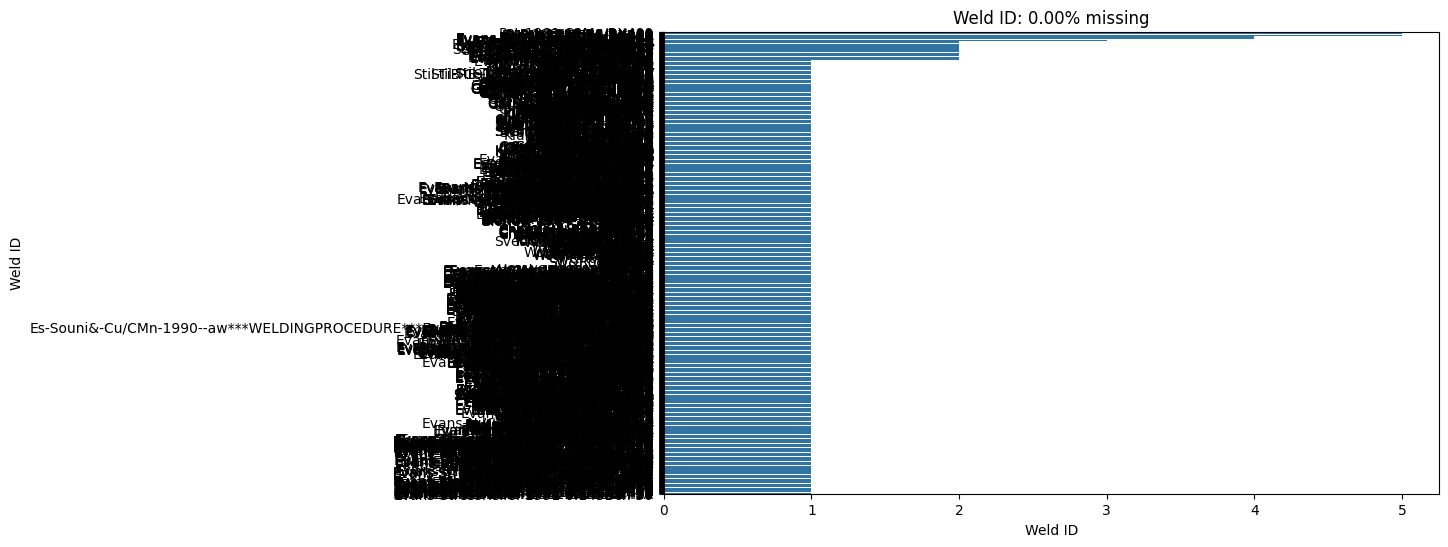

In [81]:
for col_title, col in df.items():
    value_distribution(col_title, col)

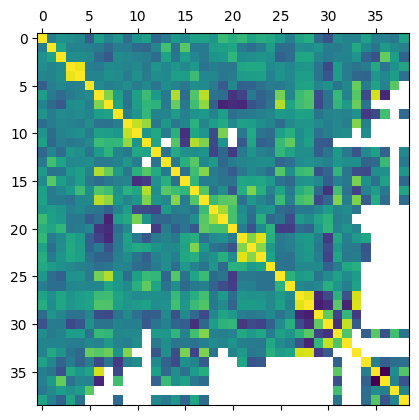

In [83]:
import matplotlib.pyplot as plt

plt.matshow(df[numeric_cols].corr())
plt.show()
